In [249]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd

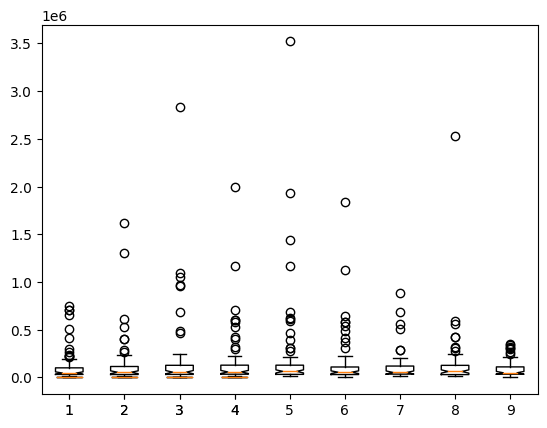

In [308]:
df = pd.read_csv('pages.csv')
for i in range(df["CTR"].count()):
    df.at[i, 'CTR'] = float(df.at[i, 'CTR'].replace('%', ''))


plt.boxplot([[1, 2, 3, 4, 7, 1], [1, 2, 3, 4, 7, 1], [1, 2, 3, 4, 7, 1], [1, 2, 3, 4, 7, 1]])
plt.boxplot([df.loc[(df['service'] == 1) & (df['category'] == j), 'Impressions'].tolist()  for j in range(df['category'].max())], patch_artist = False,
                notch ='False')
plt.show()

In [271]:
# some usefull fields
# service
services_code = [i+1 for i in range(df['service'].max())]
service_news_counter = [df.loc[df['service'] == i+1, 'Top pages'].count() for i in range(df['service'].max())]
service_impression_total = [df.loc[df['service'] == i+1, 'Impressions'].sum() for i in range(df['service'].max())]
service_impression_average = [df.loc[df['service'] == i+1, 'Impressions'].mean() for i in range(df['service'].max())]
service_clicks_total = [df.loc[df['service'] == i+1, 'Clicks'].sum() for i in range(df['service'].max())]
service_clicks_average = [df.loc[df['service'] == i+1, 'Clicks'].mean() for i in range(df['service'].max())]
# category
category_code = [[i+1 for i in range(df['category'].max())] for _ in range(df['service'].max())]
category_news_counter = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Top pages'].count() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_impression_total = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Impressions'].sum() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_impression_average = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Impressions'].mean() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_clicks_total = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Clicks'].sum() for j in range(df['category'].max())] for i in range(df['service'].max())]
category_clicks_average = [[df.loc[(df['service'] == i+1) & (df['category'] == j+1), 'Clicks'].mean() for j in range(df['category'].max())] for i in range(df['service'].max())]

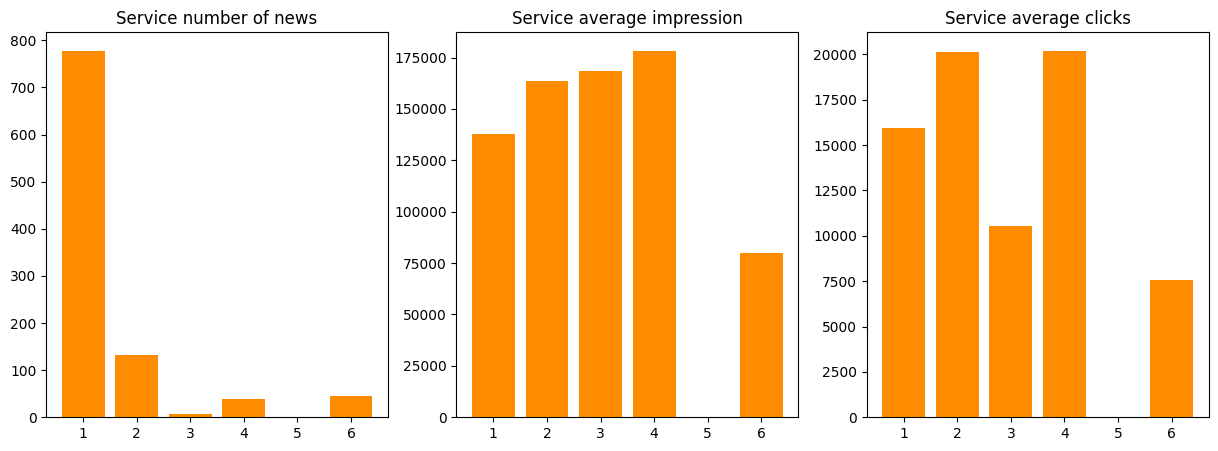

In [252]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(services_code, service_news_counter, color='DarkOrange')
plt.title("Service number of news")
plt.subplot(1, 3, 2)
plt.bar(services_code, service_impression_average, color='DarkOrange')
plt.title("Service average impression")
plt.subplot(1, 3, 3)
plt.bar(services_code, service_clicks_average, color='DarkOrange')
plt.title("Service average clicks")
plt.show()

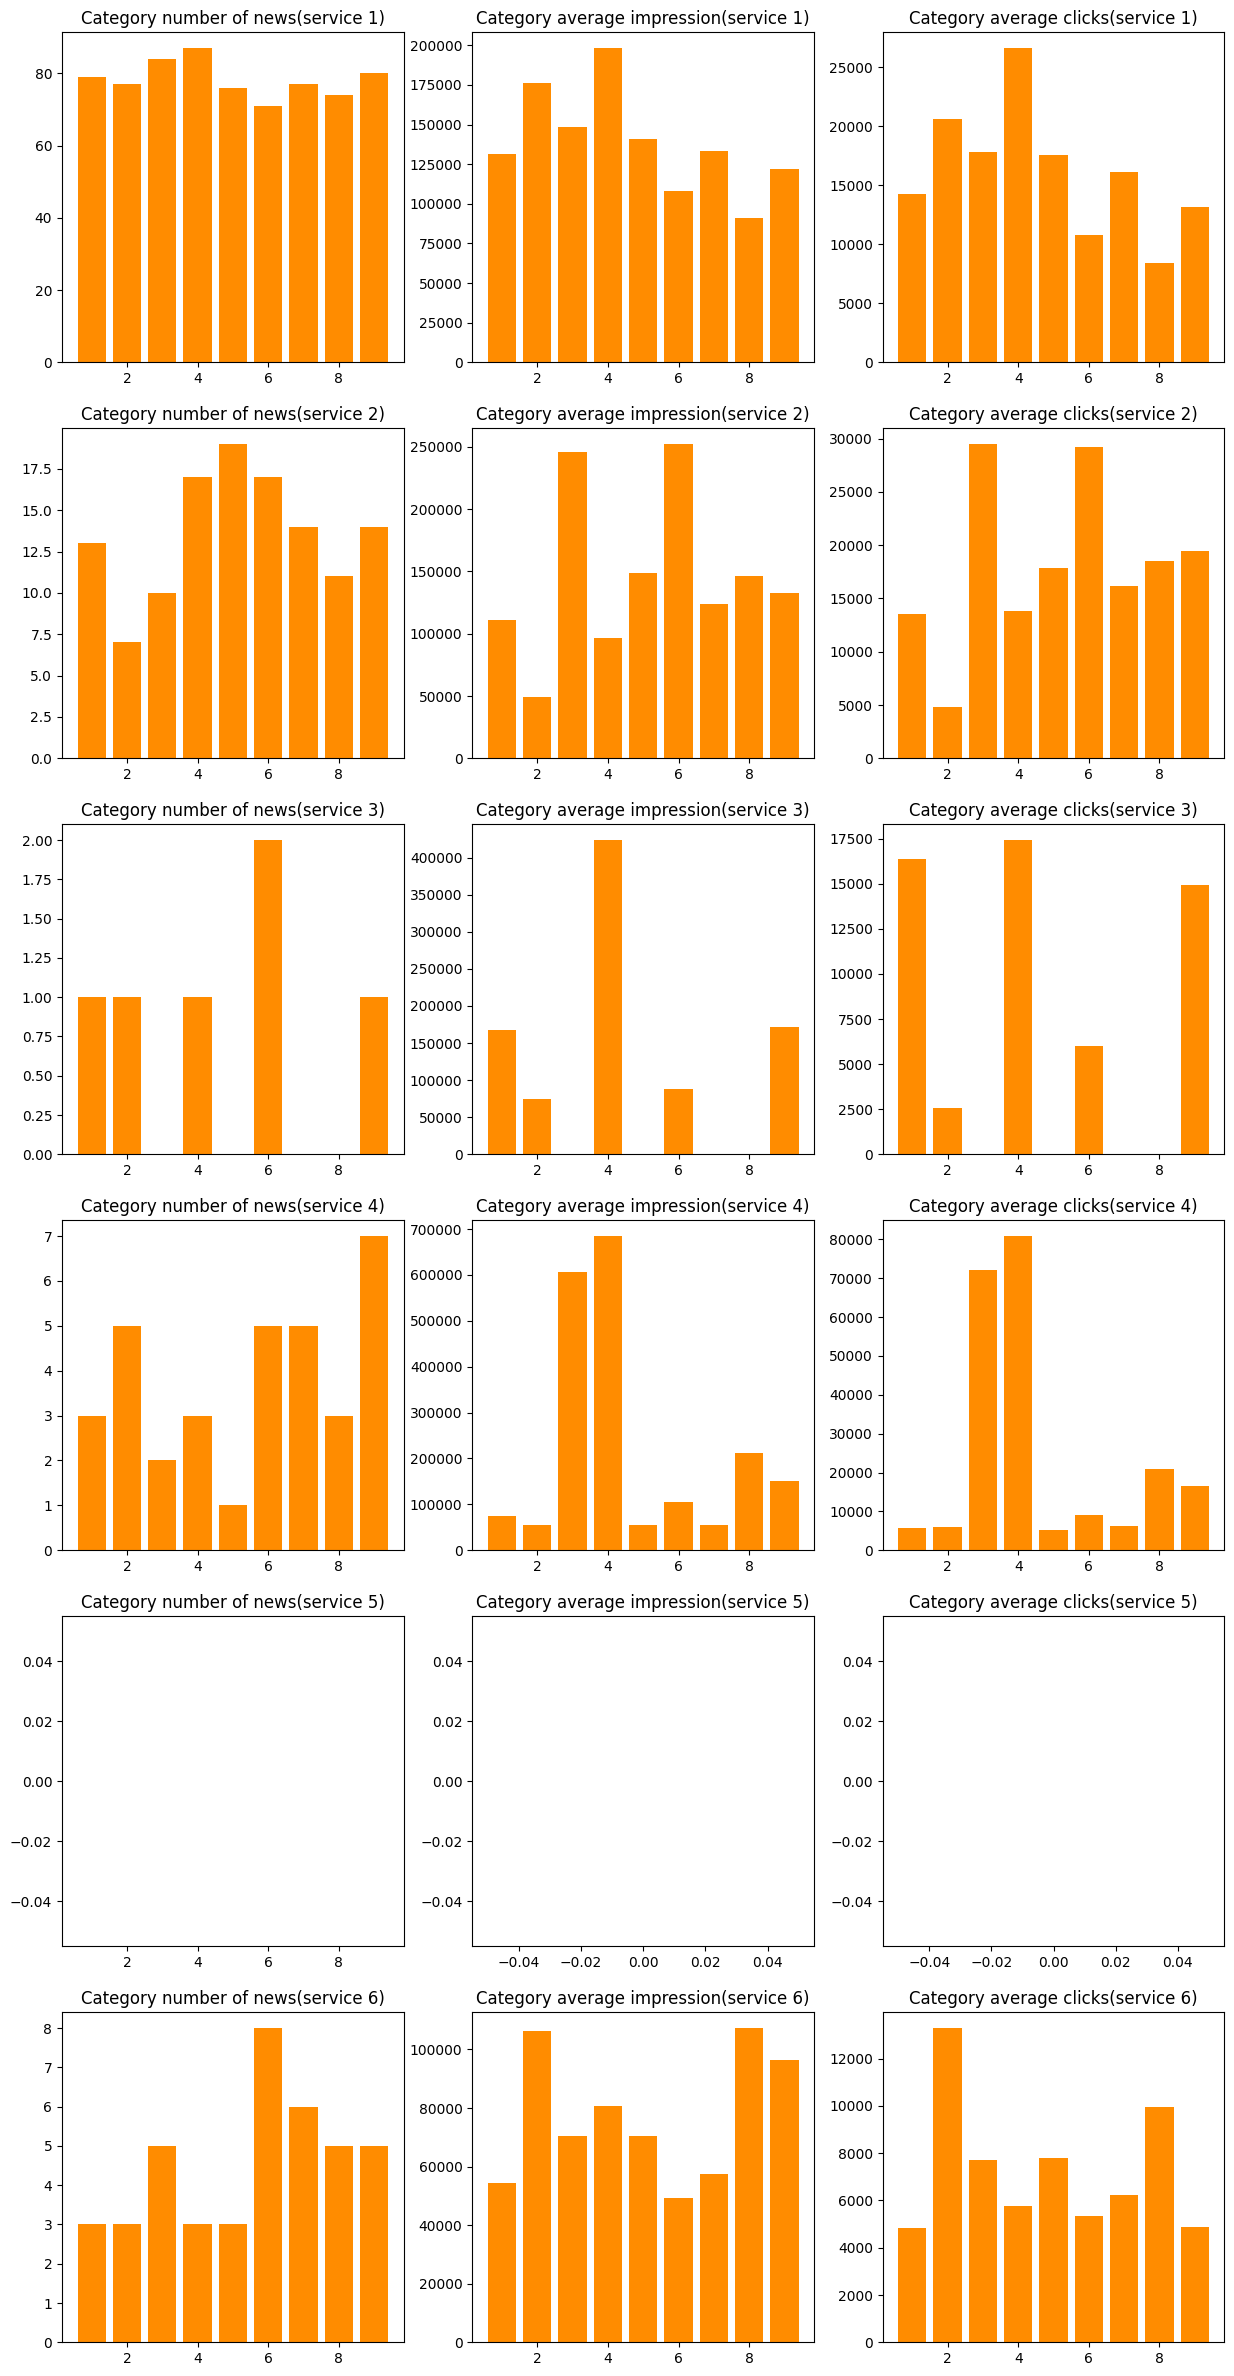

In [288]:
plt.figure(figsize=(15, 5 * df['service'].max()))
for i in range(df['service'].max()):
    plt.subplot(df['service'].max(), 3, 1 + 3 * i)
    plt.bar(category_code[i], category_news_counter[i], color='DarkOrange')
    plt.title("Category number of news(service {})".format(i+1))
    plt.subplot(df['service'].max(), 3, 2 + 3 * i)
    plt.bar(category_code[i], category_impression_average[i], color='DarkOrange')
    plt.title("Category average impression(service {})".format(i+1))
    plt.subplot(df['service'].max(), 3, 3 + 3 * i)
    plt.bar(category_code[i], category_clicks_average[i], color='DarkOrange')
    plt.title("Category average clicks(service {})".format(i+1))
plt.show()

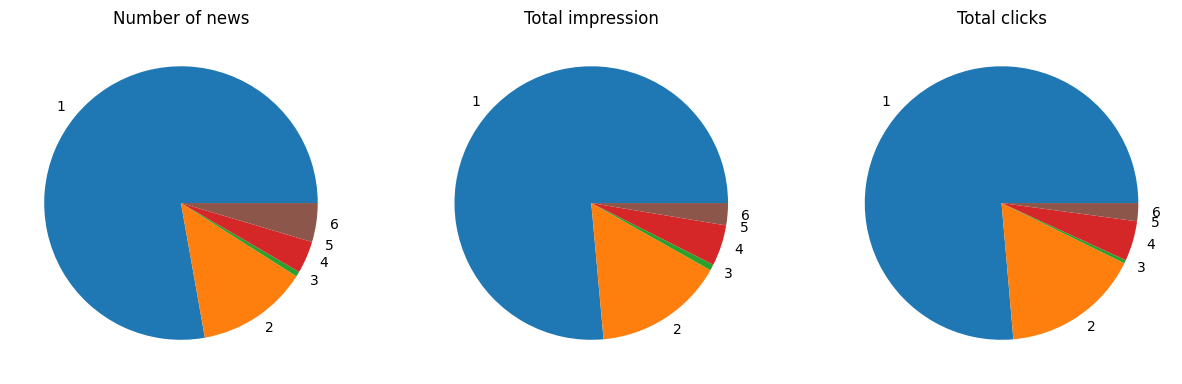

In [253]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(service_news_counter, labels=services_code)
plt.title("Number of news")

plt.subplot(1, 3, 2)
plt.pie(service_impression_total, labels=services_code)
plt.title("Total impression")

plt.subplot(1, 3, 3)
plt.pie(service_clicks_total, labels=services_code)
plt.title("Total clicks")
plt.show()

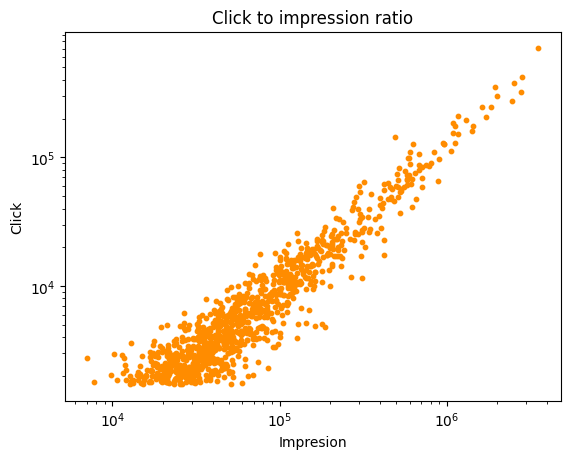

In [309]:
x = df['Impressions']
y = df['Clicks']
colors = df['CTR']
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, c='DarkOrange', s = 10)
plt.title("Click to impression ratio")
plt.xlabel("Impresion")
plt.ylabel("Click")
plt.show()

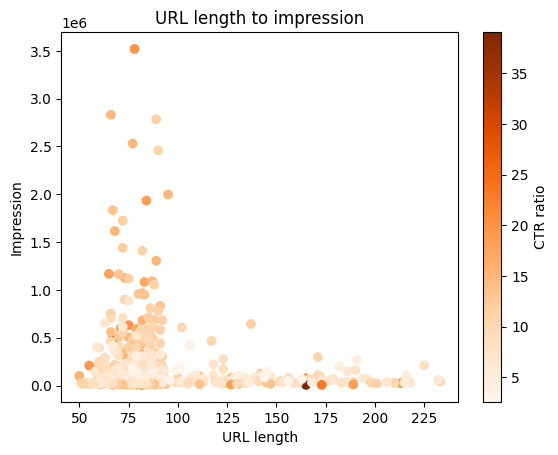

In [272]:
x = [len(i) for i in df['Top pages']]

y = [i for i in df['Impressions']]
colors = [i for i in df['CTR']]
plt.scatter(x, y, c=colors, cmap='Oranges')
plt.title("URL length to impression")
plt.xlabel("URL length")
plt.ylabel("Impression")
plt.colorbar().set_label("CTR ratio")
plt.show()